# Link to my GitHub Repo: 
# https://github.com/aniawebb/DSCI-510-FinalProject/blob/main/README.md

## _Favorite music genres among consumers in the United States as of July 2018, by age group_ 

### Data Source: https://www.statista.com/statistics/253915/favorite-music-genres-in-the-us/

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
statista_filename = "favorite-music-genres-in-the-us-2018-by-age.xlsx"
artist_df_filename = "tables/artist.csv"

### This data provides information on favorite music genres among consumers in the United States as of July 2018, sorted by age group.

In [3]:
def data_import_and_cleaning(statista_filename):
    statista_data = pd.read_excel(statista_filename, 'Data')
    statista_data.columns = statista_data.iloc[3] 
    statista_data = statista_data[4:]
    statista_data = statista_data.iloc[: , 1:]
    statista_data = statista_data.iloc[: , 0:]
    statista_data = statista_data.iloc[: , :-1]
    statista_data.rename(columns={statista_data.columns[0]: "Genres" }, inplace = True)
    statista_data = statista_data.reset_index(drop=True)
    statista_data= statista_data.rename(columns=str.lower)
    
    os.makedirs('tables', exist_ok=True)  
    statista_data.to_csv('tables/statista_data.csv')  
    
    return statista_data

In [4]:
def find_matching_genre(statista_filename, artist_df_filename):
    statista_data= data_import_and_cleaning(statista_filename)
    genres_per_age = statista_data['genres'].tolist()

    genres_per_age_lower = []
    for genre in genres_per_age:
        genres_per_age_lower.append(genre.lower())
        
    artist_df = pd.read_csv(artist_df_filename)
    genre_of_artist = artist_df['Genres'][0]
    
    matched_genre = list(filter(lambda genre: genre_of_artist in genre, genres_per_age_lower))[0]
    
    return matched_genre

In [26]:
def make_genre_by_age_piechart(statista_filename, artist_df_filename):
    statista_data= data_import_and_cleaning(statista_filename)
    statista_data= statista_data.T
    statista_data = pd.DataFrame(statista_data.values[1:], columns= statista_data.iloc[0]) #make genres the header columns
    statista_data['age_range'] = ['16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+']
    statista_data = statista_data.reset_index(drop=True)
    statista_data= statista_data.rename(columns=str.lower)

    matched_genre = find_matching_genre(statista_filename, artist_df_filename)
    statista_data = statista_data.sort_values(matched_genre)
    genre_by_age = statista_data[matched_genre]

    plt.figure(figsize=(10,10))
    plt.title("Percentage of Age Ranges that Listen to Selected Genre", y=1.01, bbox={'facecolor':'0.8', 'edgecolor':'pink', 'pad':5})
    genre_by_age.plot.pie(autopct=lambda x: '{:.0f}%'.format(x*genre_by_age.sum()/100),
                          shadow=True,
                          explode = (0, 0, 0, 0, 0, 0, 0.1),
                          labels = statista_data['age_range'])
    plt.text(.05, -1.3, "Per 3,000 respondants in 2018, this data shows the breakdown of favorite music genres per age group.\nThe singled-out slice represents the age range that you, as the listener, are most likely to fall into based on your favorite music artist.", ha='center', weight='bold')
    
    os.makedirs('figures', exist_ok=True)  
    plt.savefig('figures/Genre_By_Age.png', bbox_inches='tight')
    
    plt.show()

3                   genres 16-19 20-24 25-34 35-44 45-54 55-64 65+
0                Pop Music    52    54    56    46    42    25  19
1               Rock Music    28    39    44    42    48    31  17
2              Hip Hop/Rap    48    54    42    33    15     5   1
3   Indie/Alternative Rock    31    40    35    28    21    13   5
4             Classic Rock    26    36    44    46    62    60  48
5               Soundtrack    15    23    24    21    18    15  16
6   RnB (Rhythm and Blues)    23    22    22    22    21    15  16
7             Instrumental    22    23    20    13    13    17  16
8          Country/Western    19    26    37    31    38    38  40
9        Singer/Songwriter    21    21    20    17    15    18  15
10           Rock 'n' Roll    28    30    40    42    49    40  41
11     Show Music/Musicals    20    19    17    14    15    16  24
pop music


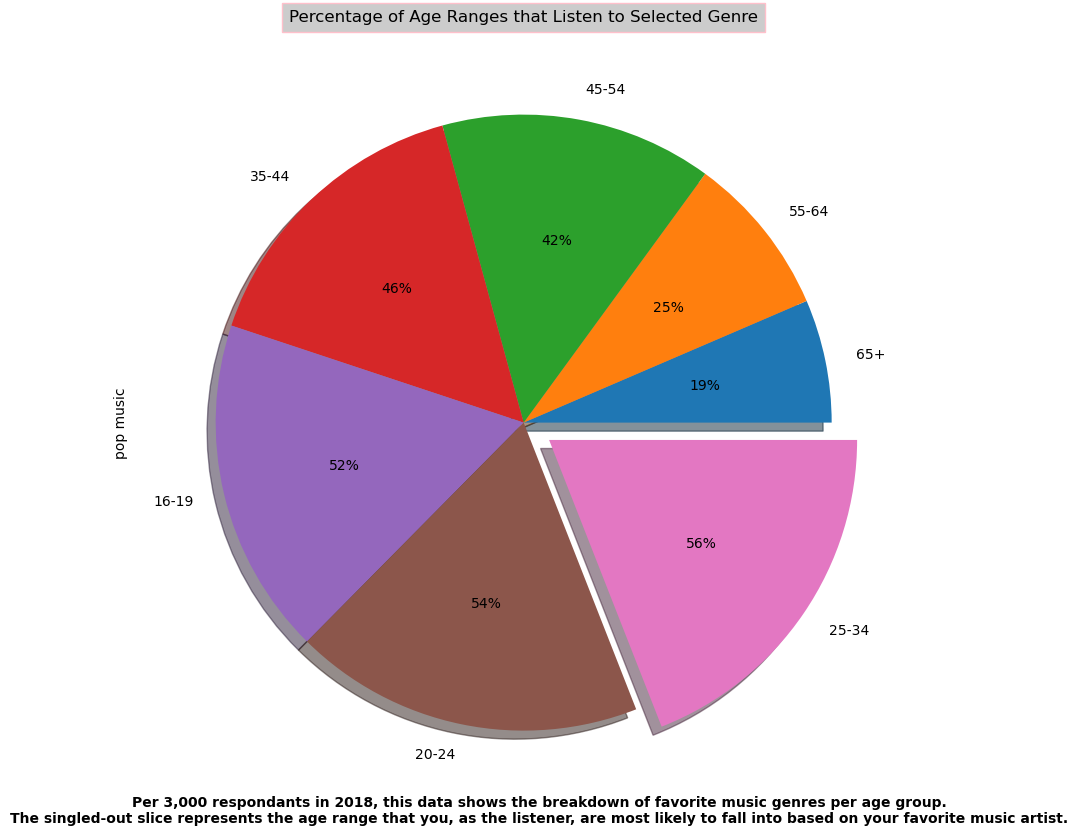

In [25]:
if __name__ == '__main__':
    print(data_import_and_cleaning(statista_filename))
    print(find_matching_genre(statista_filename, artist_df_filename))
    make_genre_by_age_piechart(statista_filename, artist_df_filename)